# Machine Learning using titanic dataset
### Import libraries and read the data

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category =FutureWarning)

titanic_data = pd.read_csv('C:/Users/sam/Desktop/PYTHON/MACHINE LEARNING/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  Find out if the data contains any missing values

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### data.describe() can be used to see the statistical attributes of the continuous variables

In [8]:
titanic_data.describe()  #statistical attributes of the continuous variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let us see the survival rate with different continuous variables

In [9]:
titanic_data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### Let us see the survival rate when the age is missing

In [10]:
titanic_data.groupby(titanic_data['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### People without age reported were less likely to survive (p=0.29). For this case, the missing values of age will be replace by mean of the ages

In [57]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
# print(titanic_data.head(5))
print(titanic_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             Heikkinen, Miss. Laina  female  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                           Allen, Mr. William Henry    male  35.000000   
5                                   Moran, Mr. James    male  29.699118   
6                            McCarthy, Mr. Timothy J    male  54.000000   
7  

### Let us study the Pclass, SibSp, and Parch continuous variables to see any relationship among them

<Figure size 432x288 with 0 Axes>

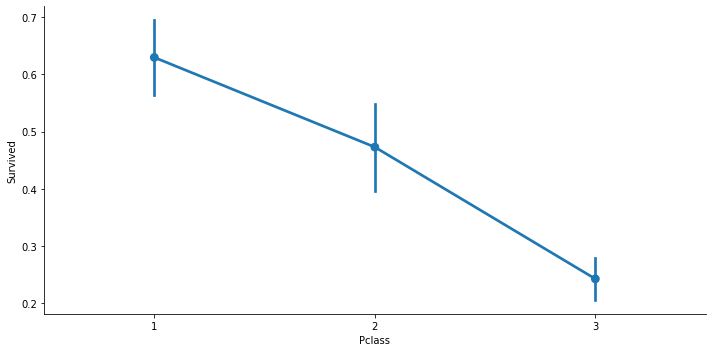

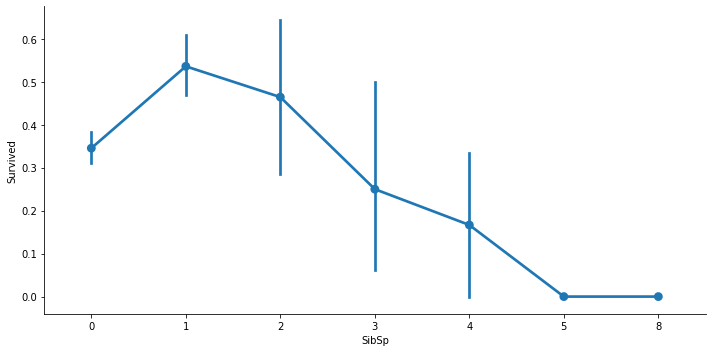

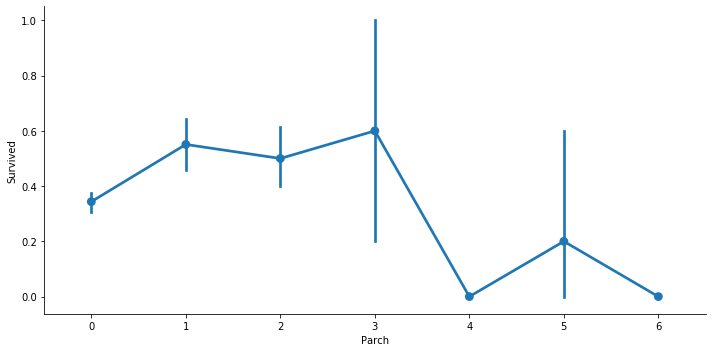

In [59]:
for i, col in enumerate(['Pclass', 'SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y = 'Survived', data = titanic_data, kind = 'point', aspect = 2,)

#### 1st plot: For 1st class passengers, roughly 60% people survived which implies better class is more likely to survive
#### 2nd Plot: People with more siblings are less likely to survive
#### 3rd plot: Those with more parents and children are less likely to survive
### we can merge 'SibSp' and 'Parch' feature into single feature

In [60]:
titanic_data['Family_cnt']= titanic_data['SibSp']+ titanic_data['Parch']

In [61]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Drop the unnecessary variables 

In [62]:
titanic_data.drop(['PassengerId', 'SibSp', 'Parch'], axis=1)  # index =1 for deleting the column
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Clean categorical variables

### 

In [63]:
titanic_data['Cabin_ind'] = np.where(titanic_data['Cabin'].isnull(), 0,1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


### Let us study the relation between Cabin_ind and survival rate

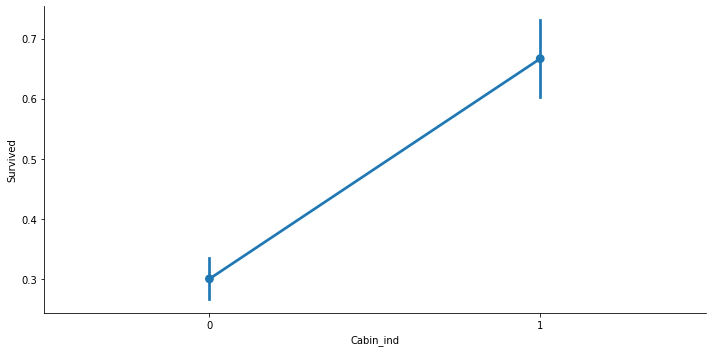

In [64]:

sns.catplot(x='Cabin_ind', y = 'Survived', data = titanic_data, kind = 'point', aspect = 2,)

### The passengers were likely to be killed when they had no cabin

### Convert 'Sex' to numeric as M = 0 and F=1

In [65]:
gender_num = {'male':0, 'female':1}
titanic_data['Sex'] = titanic_data['Sex'].map(gender_num)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


### Drop unnecessary variables

In [66]:
titanic_data.drop(['Name','Ticket','Cabin','Embarked'], axis =1, inplace =True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_cnt,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,1,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,1
4,5,0,3,0,35.0,0,0,8.0500,0,0


## Now we can model the data

In [68]:
from sklearn.model_selection import train_test_split

### Split the data into features (target variable) and labels

In [69]:
features = titanic_data.drop('Survived', axis = 1)
labels = titanic_data['Survived']

### The splitting will comprise of two steps as we are splitting into Train set, Validation set and Test sets. But the train_test_split splits the data only into 2 categories: train set and test set

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

train_features = X_train 
train_labels= y_train

val_features=  X_val
val_labels =  y_val

test_features= X_test
test_labels = y_test

### Let us see if the data are splitted correctly

In [84]:
for dataset in [train_features, val_features, test_features]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Fitting the model and evaluation

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [85]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, train_features, train_labels.values.ravel(),cv =5)    # values.ravel() converts column vector into an array
scores

array([0.83333333, 0.80373832, 0.76635514, 0.77358491, 0.85849057])

### We can see the accuracy range ~ [78, 85], the values keep changing in every run 

### Grid search to find the optimal hyperparameter for the model

In [77]:
from sklearn.model_selection import GridSearchCV   #GridSearchCV is wrapper around cross_val_score

In [78]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [86]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],       # just tuning 2 hyperparameters: 1.no. of estimators= no. of decision trees to build
    'max_depth': [2, 10, 20, None]      # just tuning 2 hyperparameters: 2. how deep each of the individual decision trees go 
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.785 (+/-0.105) for {'max_depth': 2, 'n_estimators': 5}
0.787 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.118) for {'max_depth': 2, 'n_estimators': 100}
0.794 (+/-0.088) for {'max_depth': 10, 'n_estimators': 5}
0.816 (+/-0.094) for {'max_depth': 10, 'n_estimators': 50}
0.822 (+/-0.095) for {'max_depth': 10, 'n_estimators': 100}
0.781 (+/-0.088) for {'max_depth': 20, 'n_estimators': 5}
0.805 (+/-0.093) for {'max_depth': 20, 'n_estimators': 50}
0.803 (+/-0.077) for {'max_depth': 20, 'n_estimators': 100}
0.79 (+/-0.083) for {'max_depth': None, 'n_estimators': 5}
0.813 (+/-0.062) for {'max_depth': None, 'n_estimators': 50}
0.801 (+/-0.055) for {'max_depth': None, 'n_estimators': 100}


## Lets evaluate on some unseen data of validation set

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Use the three best hyperparameter settings

In [87]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate the 3 models on the validation set

In [88]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,   # Accuracy, Precision, Recall
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.799 / P: 0.794 / R: 0.711
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.827 / P: 0.869 / R: 0.697
MAX DEPTH: None / # OF EST: 100 -- A: 0.827 / P: 0.869 / R: 0.697


#### the output was:
MAX DEPTH: 10 / # OF EST: 5 -- A: 0.799 / P: 0.794 / R: 0.711 \
##### MAX DEPTH: 10 / # OF EST: 100 -- A: 0.827 / P: 0.869 / R: 0.697 \
##### MAX DEPTH: None / # OF EST: 100 -- A: 0.827 / P: 0.869 / R: 0.697

2 of the 3 models gave identical results, so either one can be selected

## Evaluate on test set 

In [89]:
y_pred = rf2.predict(test_features)  #using the 2nd model
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.815 / P: 0.833 / R: 0.615


In [90]:
print('THe End')

THe End
